# Forest Cover Classification 

## Reading the dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("covtype.csv")

In [70]:
pd.set_option('display.max_columns', None)

In [71]:
df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1   
2            0        

## Basic Data Exploration:

In [68]:
df.describe()

Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
count  581012.000000                       581012.000000     581012.000000   
mean      142.528263                         1980.291226          0.448865   
std        38.274529                         1324.195210          0.497379   
min         0.000000                            0.000000          0.000000   
25%       119.000000                         1024.000000          0.000000   
50%       143.000000                         1710.000000          0.000000   
75%       168.000000                         2550.000000          1.000000   
max       254.000000                         7173.000000          1.000000   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4     Soil_Type1  \
count     581012.000000     581012.000000     581012.000000  581012.000000   
mean           0.051434          0.436074          0.063627       0.005217   
std            0.220882          0.495897          0.244087       0.072039   
min            0.000000          0.000000          0.000000       0.000000   
25%            0.000000          0.000000          0.000000       0.000000   
50%            0.000000          0.000000          0.000000       0.000000   
75%            0.000000          1.000000          0.000000       0.000000   
max            1.000000          1.000000          1.000000       1.000000   

          Soil_Type2     Soil_Type3     Soil_Type4     Soil_Type5  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.012952       0.008301       0.021335       0.002749   
std         0.113066       0.090731       0.144499       0.052356   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          Soil_Type6     Soil_Type7     Soil_Type8     Soil_Type9  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.011316    

In [69]:
df.shape

(581012, 55)

### Checking if dataset is balanced:

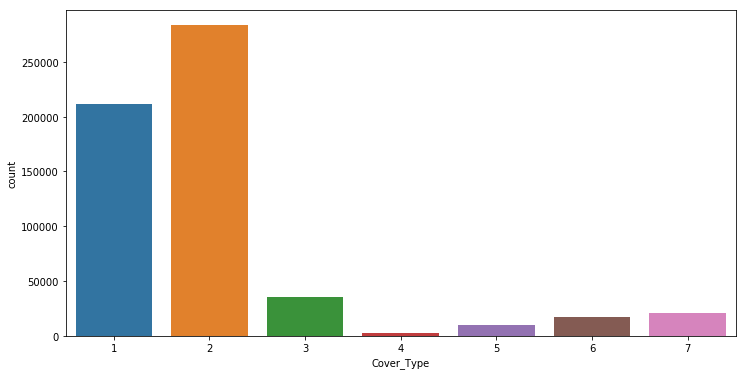

In [67]:
plt.figure(figsize = (12,6))
sns.countplot(df['Cover_Type'])
plt.show()

In [9]:
df['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

<b> Dataset is very imbalanced </b> 

### Checking if dataset has NULL values:

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

<b> Clearly, the dataset has no null/empty values </b>

### Checking the Skewness of the numerical columns:

In [8]:
columns = df.columns.tolist()    

In [9]:
def dist_plot(i):
    sns.distplot(df[i])
    plt.show()

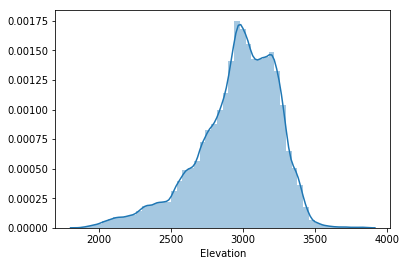

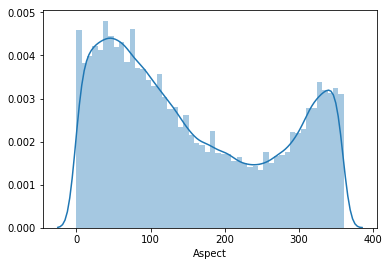

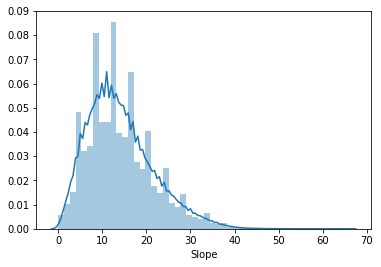

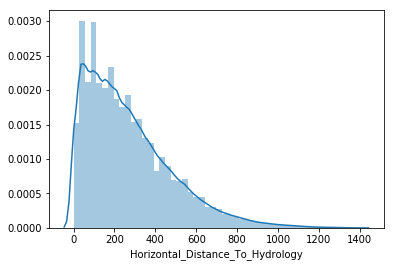

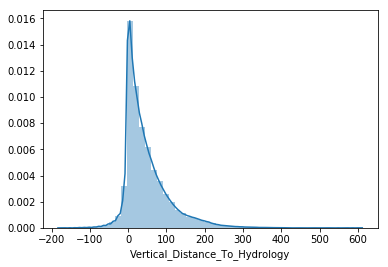

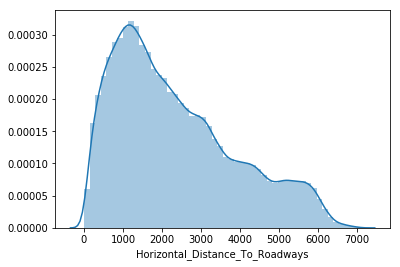

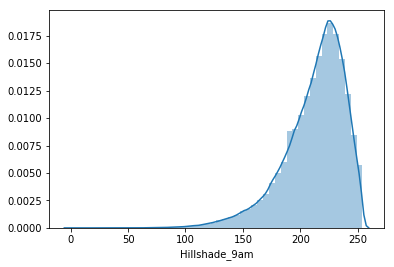

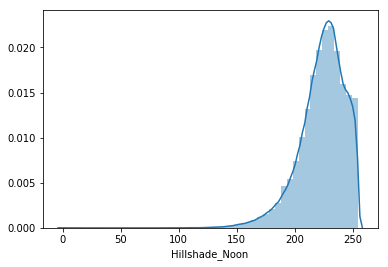

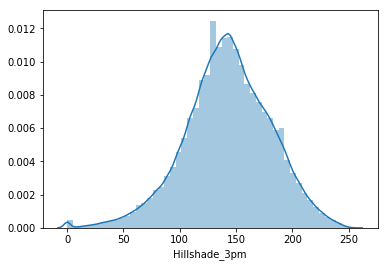

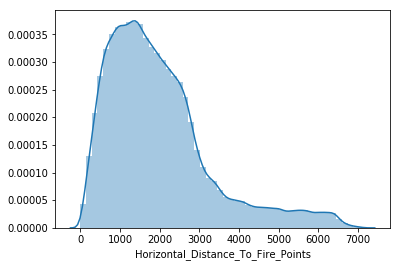

In [10]:
for i in range(10):
    col_name = columns[i]
    dist_plot(col_name)

<b> The numerical columns are all skewed and Vertical_Distance_to_Hydrology has negative values </b>

### Checking if numerical columns have Outliers:

In [11]:
def box_plot(i):
    sns.boxplot(df[i])
    plt.show()

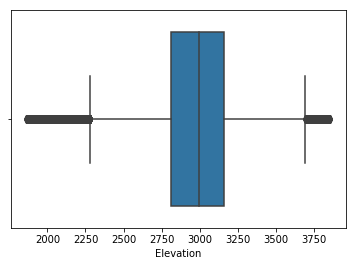

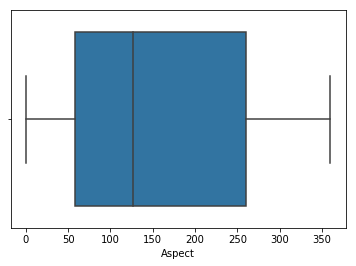

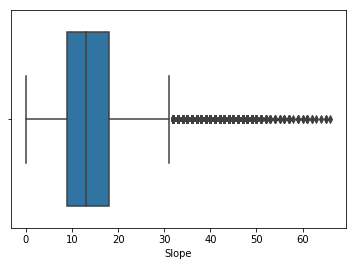

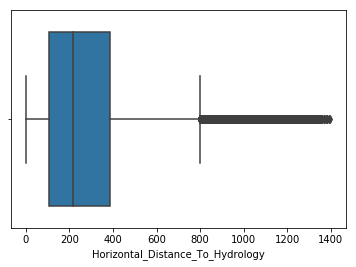

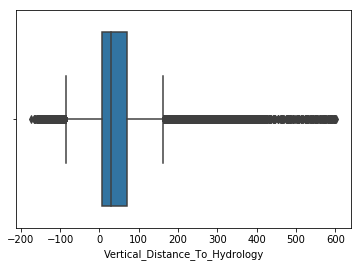

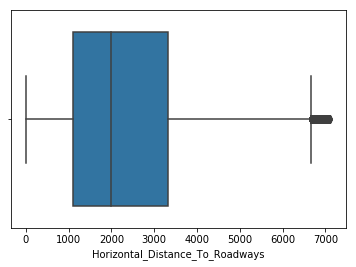

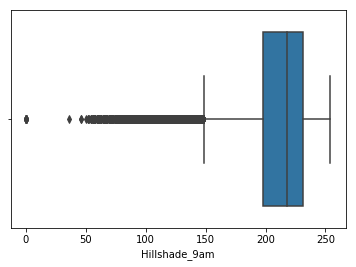

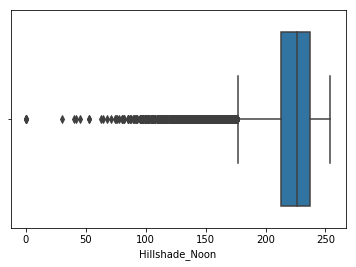

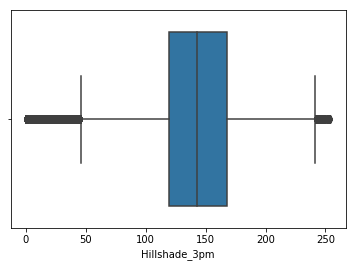

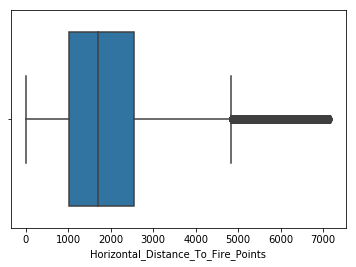

In [12]:
for i in range(10):
    col_name = columns[i]
    box_plot(col_name)

<b> There are outliers in all numerical columns with the exception of Aspect </b>

<b> The dataset does not have any duplicate/useless columns </b>

### Checking the correlation of Cover_Type with the numerical variables:

In [14]:
cat = []
for i in range(10):
    cat.append(columns[i])

In [15]:
df1 = df[cat]

In [16]:
df1['Cover_Type'] = df['Cover_Type']

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


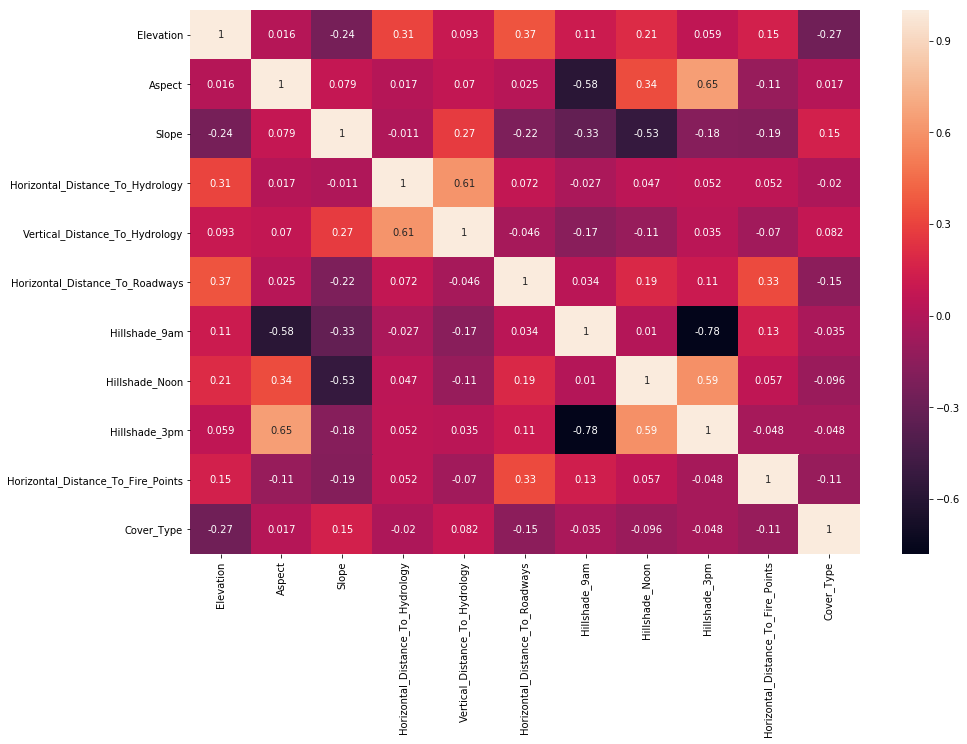

In [20]:
plt.figure(figsize = (15, 10))
sns.heatmap(df1.corr(), annot = True)

<b> The numerical columns do not have high correlation with the CoverType. In order to check the effect of each column on Cover_Type, Exploratory Analysis must be done </b>

## Exploratory Analysis:

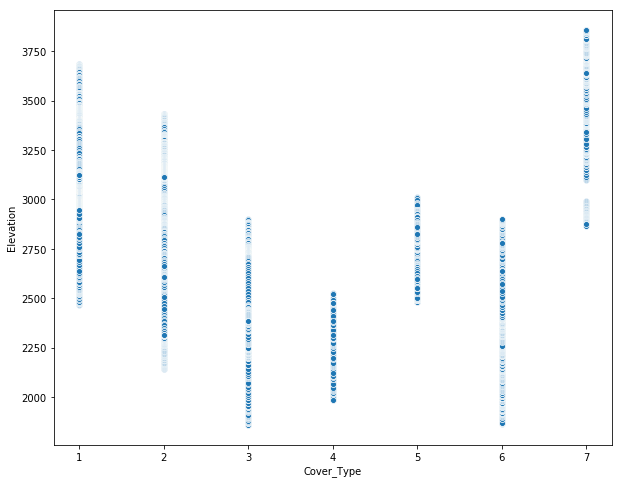

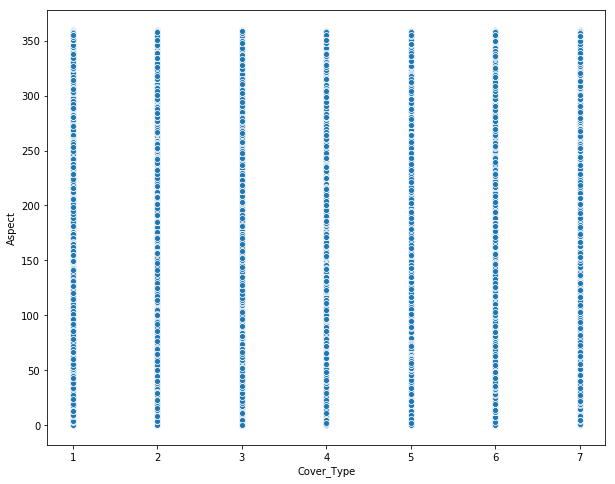

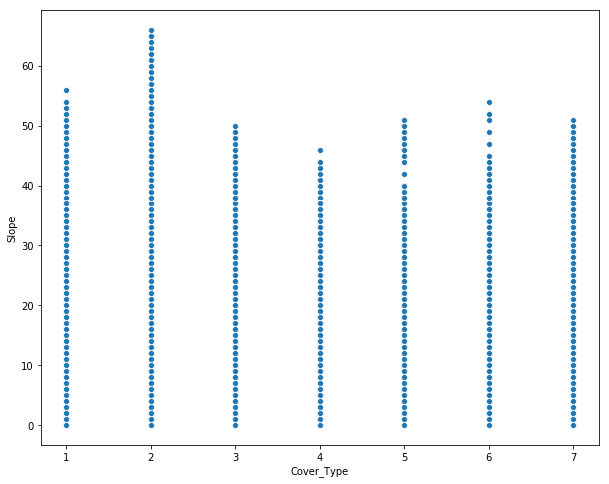

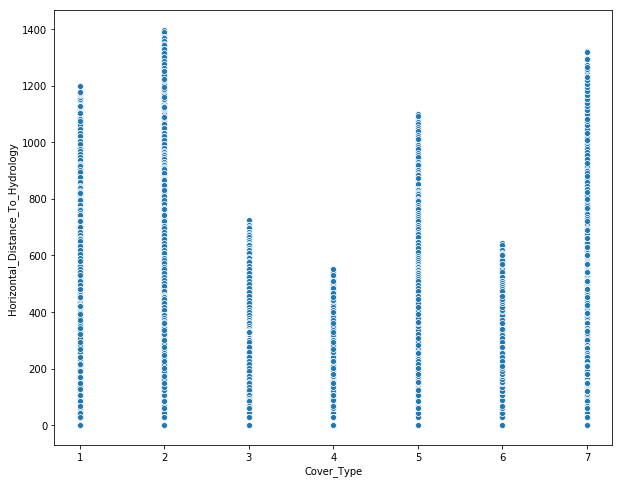

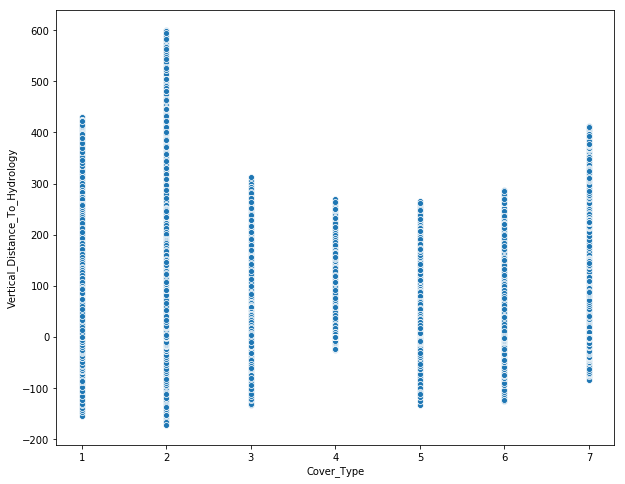

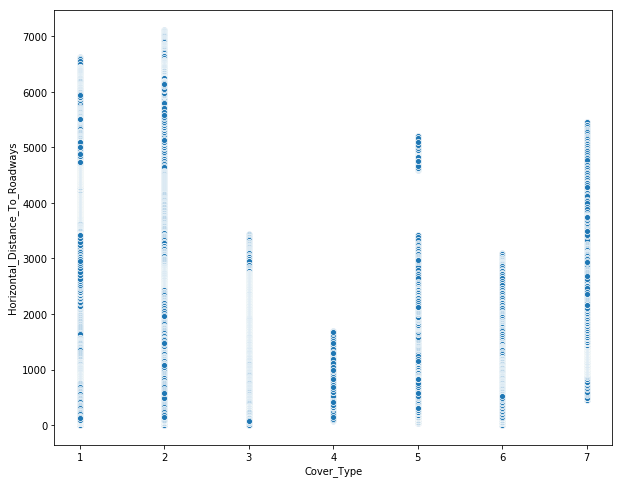

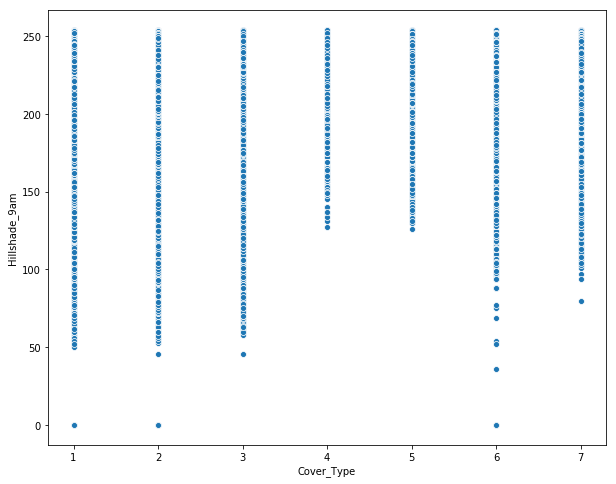

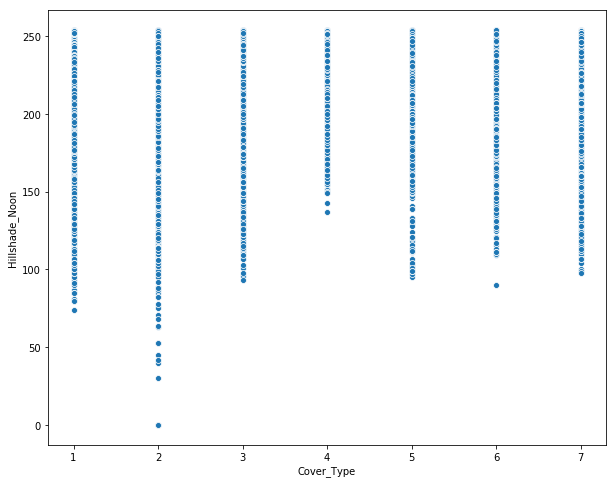

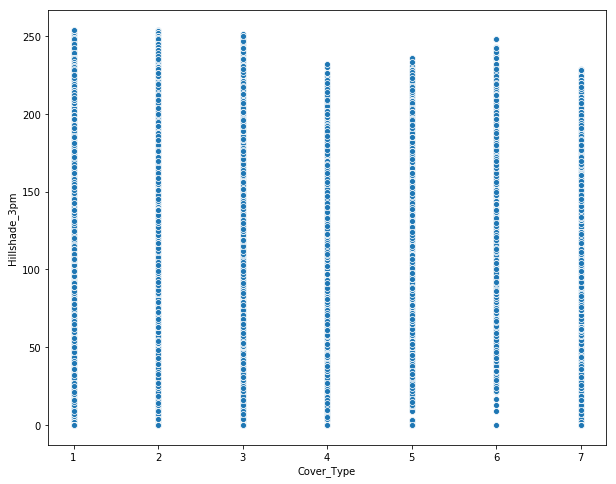

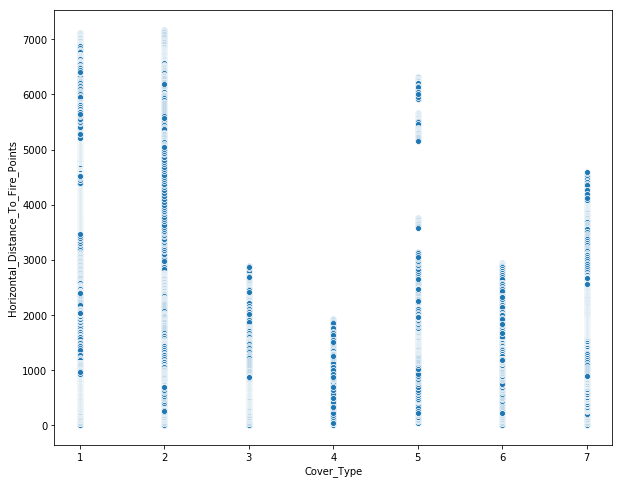

In [22]:
for i in cat:
    plt.figure(figsize = (10, 8))
    sns.scatterplot(x = df1['Cover_Type'], y = df1[i], data = df1)
    plt.show()

<b> Elevation is a very clear indicator of the type of tree as shown in the scatterplot. The other variables don't give any clear indications. </b>

<b> Trying to run exploratory analysis on the dataset as a whole does not yield any tangible results. </b>

## Sampling the Dataset

### In the following code, we take a sample of the dataset containing equal instances for each cover type. A smaller sample makes it easier to identify information and patterns from the dataset 

In [5]:
eda_df = df.copy()

eda_df.replace({'Cover_Type': {1: 'Spruce/Fir', 2: 'Lodgepole Pine', 3: 'Ponderosa Pine',
                               4: 'Cottonwood/Willow', 5: 'Aspen', 6: 'Douglas Fir', 7: 'Krummholz'}}, 
               inplace = True)

In [6]:
sample_df = eda_df.groupby('Cover_Type', group_keys=False).apply(pd.DataFrame.sample, n=1000) 

In [7]:
sample_df

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
140760       2931      17      9                                30   
429338       2731     332      9                               255   
114323       2740     357      9                                30   
389166       2840     114     21                               242   
252762       2856     288     20                                30   
...           ...     ...    ...                               ...   
260224       3283     166      8                               495   
362203       3433     102      8                               661   
78951        2939      85      3                                42   
523581       3299      68      9                                67   
319464       3403      95     24                               633   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
140760                               5                             4722   
429338                               7                             1155   
114323                               2                             1614   
389166                             118                             1932   
252762                               6                             2147   
...                                ...                              ...   
260224                             107                             3513   
362203                             148                             2230   
78951                              -10                             4852   
523581                               6                             2136   
319464                             121                             2429   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
140760            213             221            145   
429338            198             228            170   
114323            207             225            156   
389166            251             214             81   
252762            159             233            212   
...               ...             ...            ...   
260224            227             243            149   
362203            234             230            128   
78951             223             234            147   
523581            230             221            124   
319464            250             198             64   

        Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
140760                                2064                 1   
429338                                1973                 0   
114323                                2569                 1   
389166                                 594                 0   
252762                                 969                 0   
...                                    ...               ...   
260224                                2769                 1   
362203                                1443                 1   
78951                                 4184                 1   
523581                                2165                 0   
319464                                2192                 1   

        Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  Soil_Type1  \
140760                 0                 0                 0           0   
429338                 0                 1                 0           0   
114323                 0                 0                 0           0   
389166                 0                 1                 0           0   
252762                 0                 1                 0           0   
...                  ...               ...               ...         ...   
260224                 0                 0                 0           0   
362203                 0                 0                 0           0   
78951                  0                 0                 0           0   
523581                 0                 1                 0    

### Identifying relationships between Soil_type and Cover_type:

In [33]:
for i in range(1,41):
    a = 'Soil_Type' + str(i)
    print(a)
    print(sample_df['Cover_Type'][sample_df[a] == 1].value_counts())
    print("\n")

Soil_Type1
Cottonwood/Willow    68
Ponderosa Pine       61
Douglas Fir          49
Name: Cover_Type, dtype: int64


Soil_Type2
Ponderosa Pine       146
Douglas Fir           78
Cottonwood/Willow     43
Aspen                 22
Lodgepole Pine         2
Name: Cover_Type, dtype: int64


Soil_Type3
Cottonwood/Willow    350
Ponderosa Pine        61
Douglas Fir           10
Lodgepole Pine         3
Name: Cover_Type, dtype: int64


Soil_Type4
Ponderosa Pine       237
Cottonwood/Willow     64
Aspen                 57
Douglas Fir           32
Lodgepole Pine        11
Spruce/Fir             2
Krummholz              1
Name: Cover_Type, dtype: int64


Soil_Type5
Douglas Fir          26
Ponderosa Pine       23
Cottonwood/Willow    15
Name: Cover_Type, dtype: int64


Soil_Type6
Cottonwood/Willow    120
Ponderosa Pine       110
Douglas Fir           68
Lodgepole Pine         1
Name: Cover_Type, dtype: int64


Soil_Type7
Series([], Name: Cover_Type, dtype: int64)


Soil_Type8
Spruce/Fir    1
Name: Cov

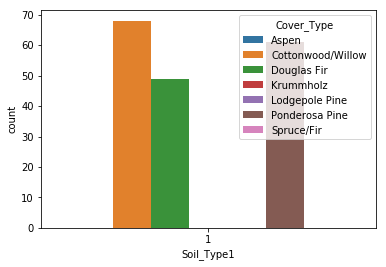

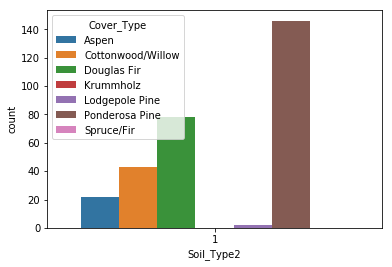

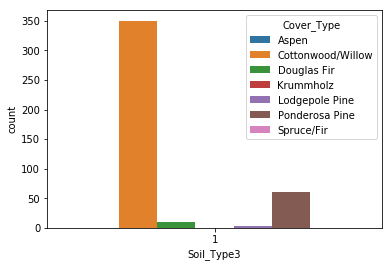

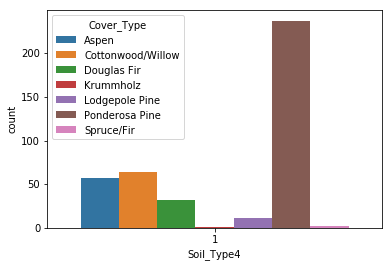

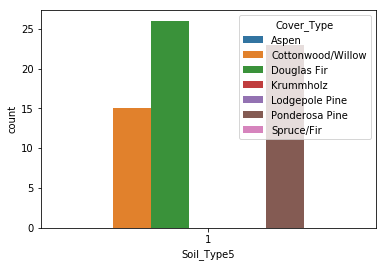

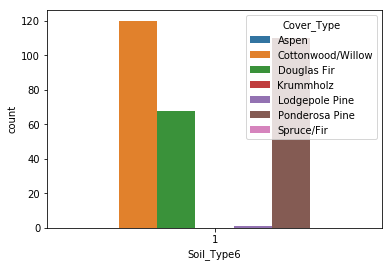

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  This is separate from the ipykernel package so we can avoid doing imports until


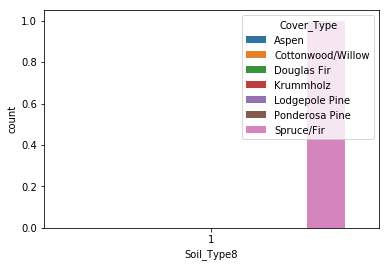

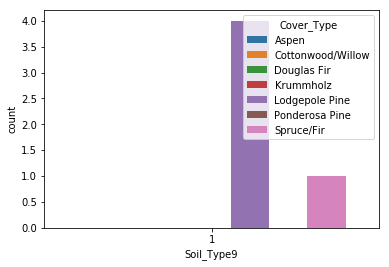

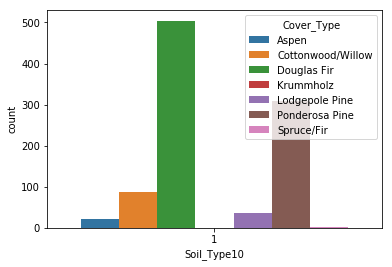

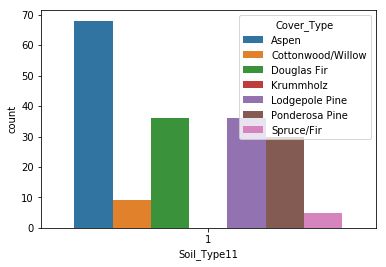

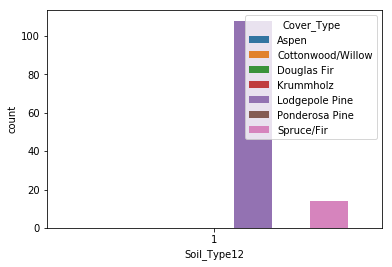

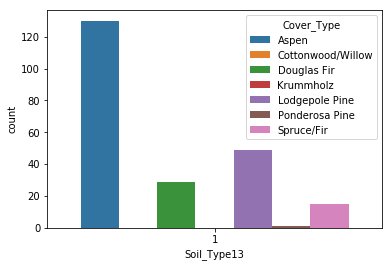

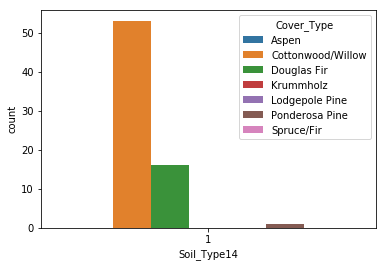

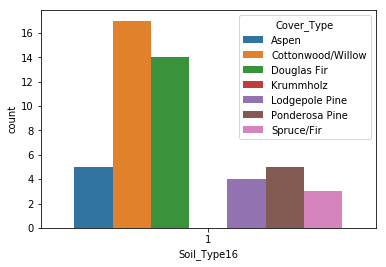

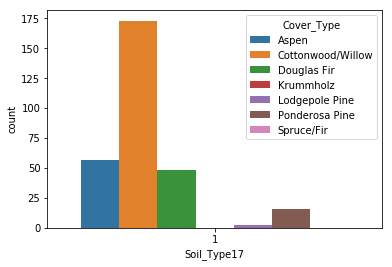

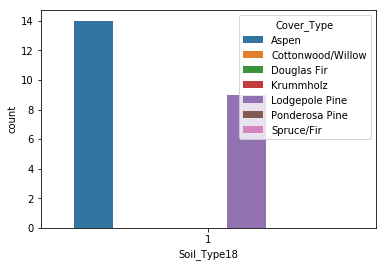

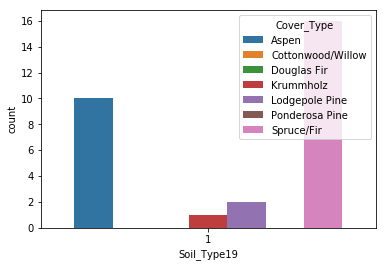

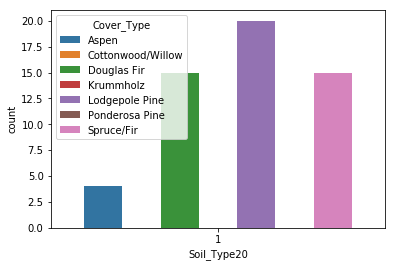

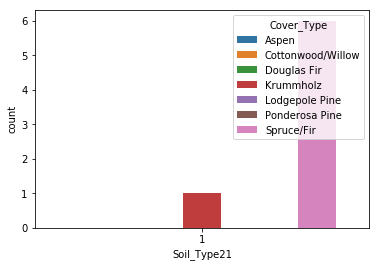

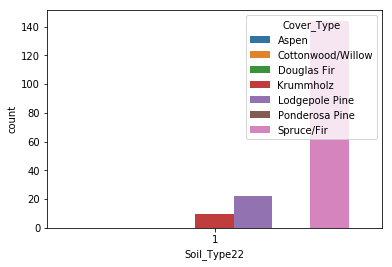

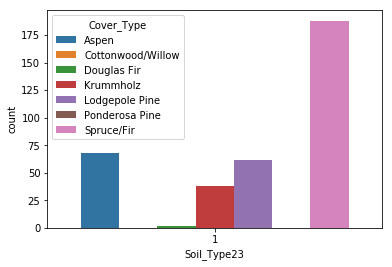

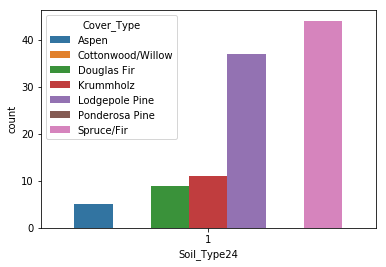

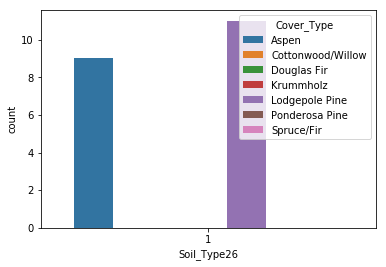

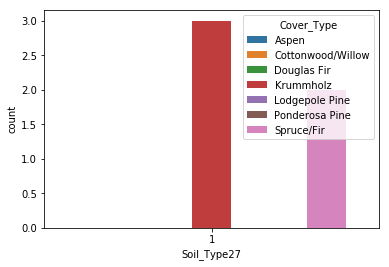

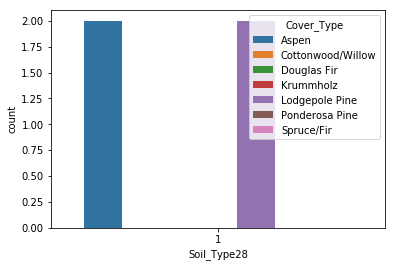

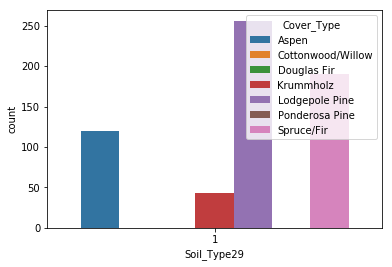

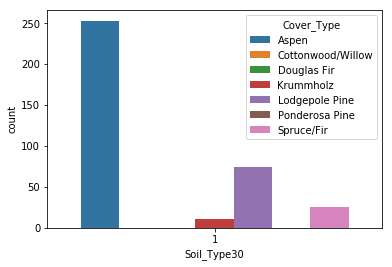

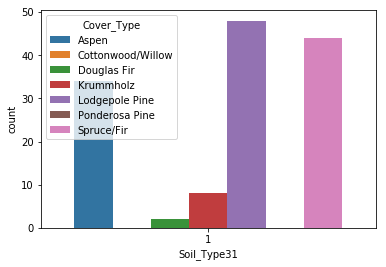

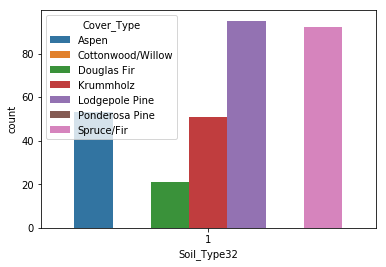

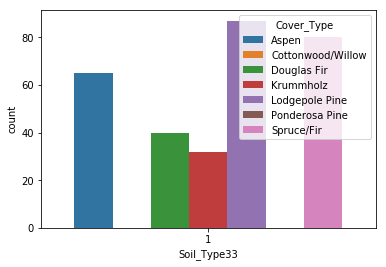

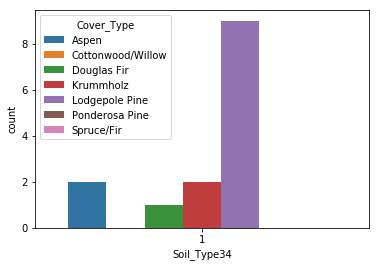

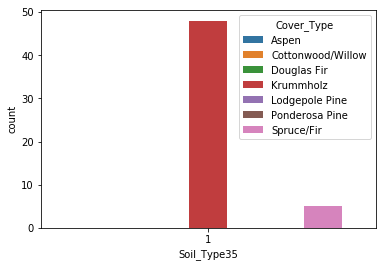

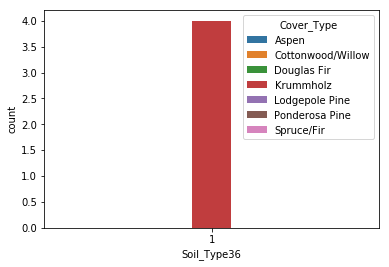

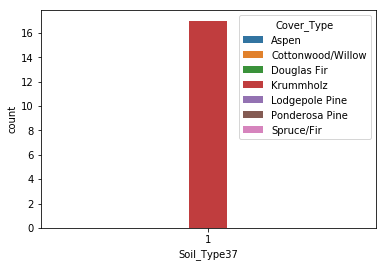

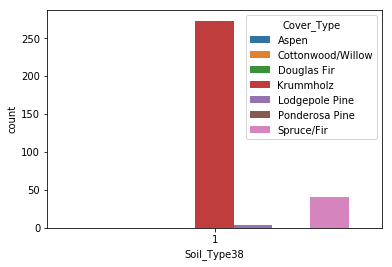

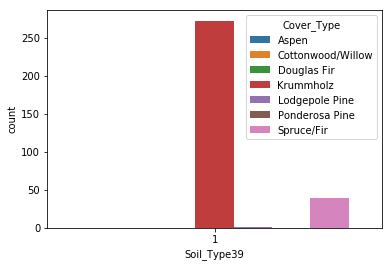

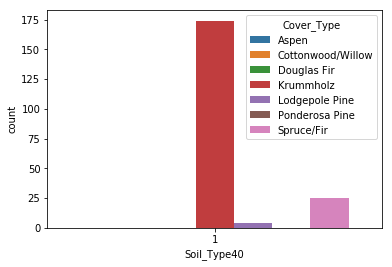

In [32]:
for i in range(1,41):
    a = 'Soil_Type' + str(i)
    if sample_df[a][sample_df[a] == 1].unique() != None:
        sns.countplot(sample_df[a][sample_df[a] == 1], hue = sample_df['Cover_Type'])
        plt.show()

<b>It can be noted that many soil types only have Krummholz and Spruce/Fir growing in them. These are trees that grow in rather harsh conditions. Some soil types like 7, 15 and 25 have no trees simply because our sample doesn't have any records of them.
    
Certain trees like Cottonwood/Willow, Ponderosa Pine and Douglas Fir mostly have a common soil type and generally occur together.

Clearly, soil_type is a pretty important indicator of cover_type.</b>

### Identifying Relationship between Elevation and Cover_type:

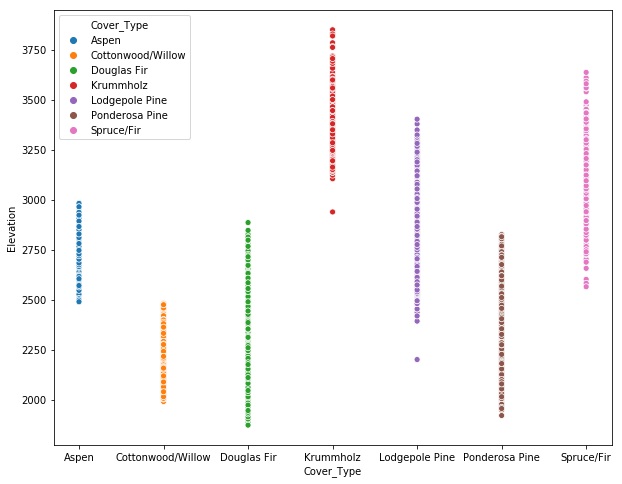

In [18]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = sample_df['Cover_Type'], y = sample_df['Elevation'], hue = sample_df['Cover_Type'])
plt.show()

<b> The scatterplot show clear distinctions but in order to make it clearer, violinplot is used. </b>

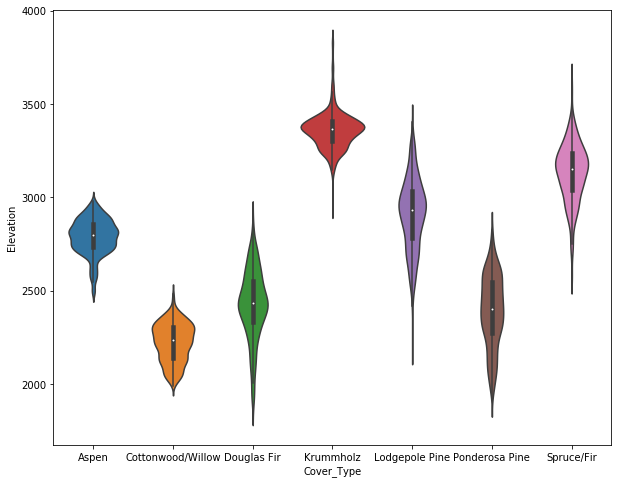

In [16]:
plt.figure(figsize = (10,8))
sns.violinplot(x = sample_df['Cover_Type'], y = sample_df['Elevation'])
plt.show()

<b>As mentioned above, Krummholz and Spruce/Fir generally occur at higher altitudes with harsher elements.

Similarly, Cottonwood/Willow, Douglas Fir and Ponderosa Pine are generally present in lower altitudes. The latter two have an almost similar elevation range. 

Clearly, Elevation is very important for identifying Cover_Type </b>

### Relationship between Cover_Type and Wilderness_Area:

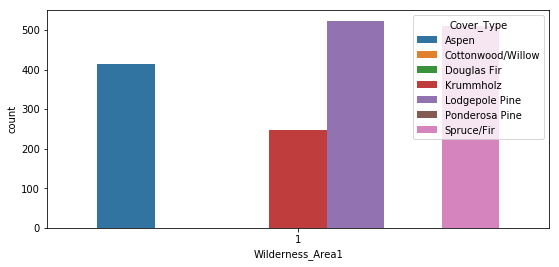

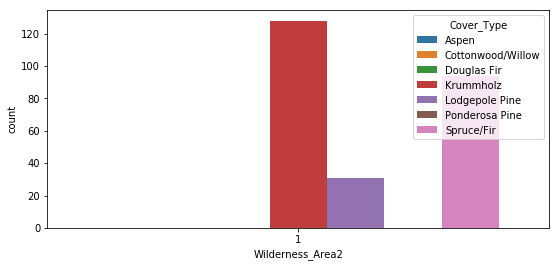

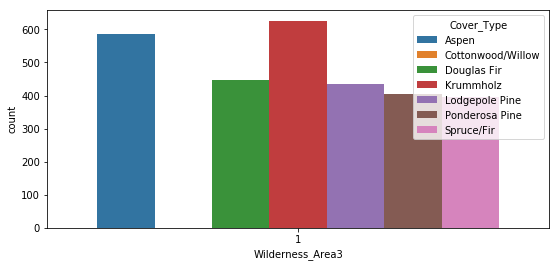

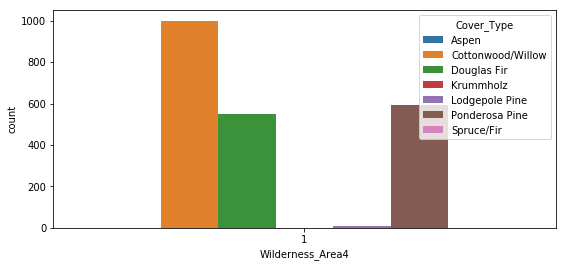

In [27]:
for i in range(1,5):
    a = 'Wilderness_Area' + str(i)
    plt.figure(figsize = (9,4))
    sns.countplot(sample_df[a][sample_df[a] == 1], hue = sample_df['Cover_Type'])
    plt.show()

<b>It is mentioned that Rawah (Area 1), Comanche Peak (Area 3) and Cache la Poudre (Area 4) have lower elevational values, with Cache la Poudre having the lowest elevation. This is reflected in the cover_type.

The highest count of Krummholz is in Neota (Area 2) which has the highest elevation. Cottonwood/Willow is only present in Cache la Poudre which has the lowest elevation.

Clearly, the Cover_Type depends on Wilderness_Area which in turn is fairly dependent on Elevation</b>

### Relationship between Wilderness_Area and Elevation:

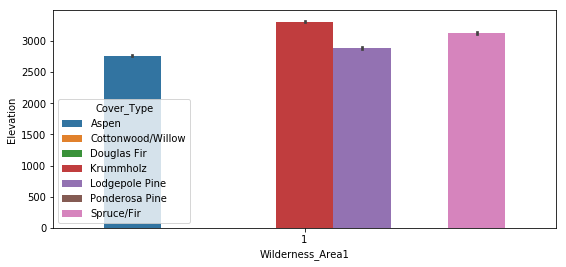

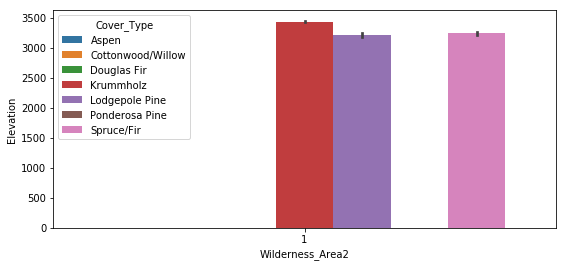

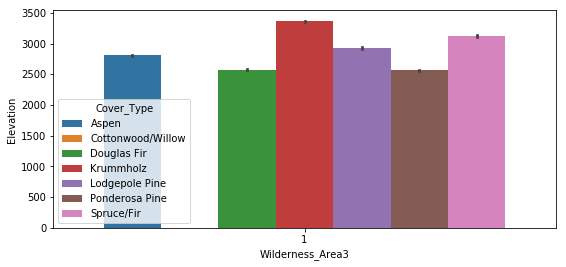

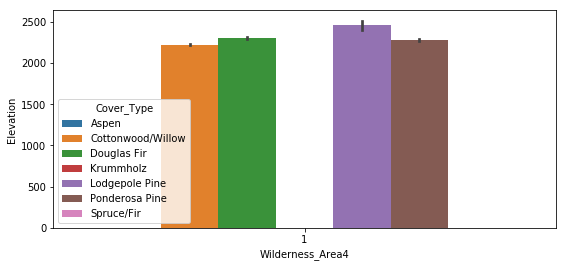

In [30]:
for i in range(1,5):
    a = 'Wilderness_Area' + str(i)
    plt.figure(figsize = (9,4))
    sns.barplot(x = sample_df[a][sample_df[a] == 1], y = sample_df['Elevation'], hue = sample_df['Cover_Type'])

<b>Comanche Peak (Area 3) has the most variety of Cover_types. Lodgepole Pine is the only cover_type that is present in all Wilderness_Areas. Aspen is not present in Neota and Couche la Poudre which have the highest and lowest elevations. 

Clearly, Wilderness_Area is a very important feature for predicting Cover_Type.</b>

### Relationship between Slope and Cover_Type:

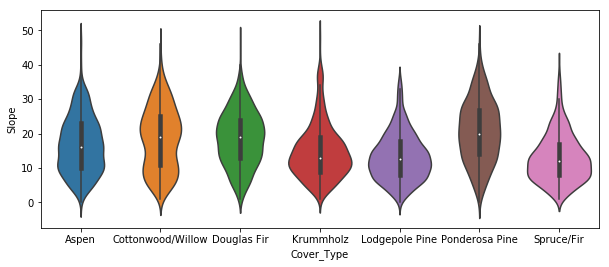

In [55]:
plt.figure(figsize = (10,4))
sns.violinplot(x = sample_df['Cover_Type'], y = sample_df['Slope'])
plt.show()

### Relationship between Slope and Wilderness_Area:

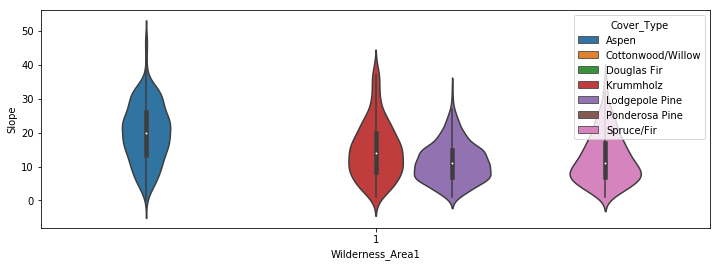

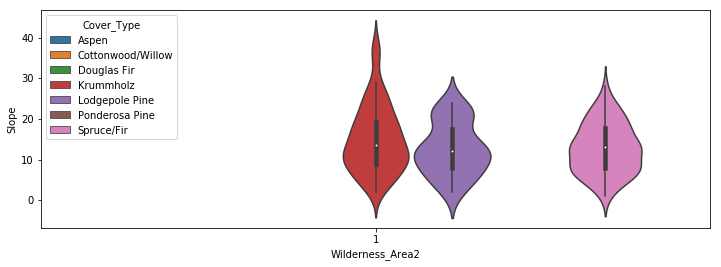

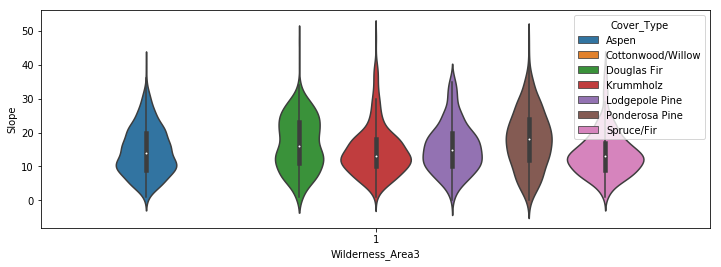

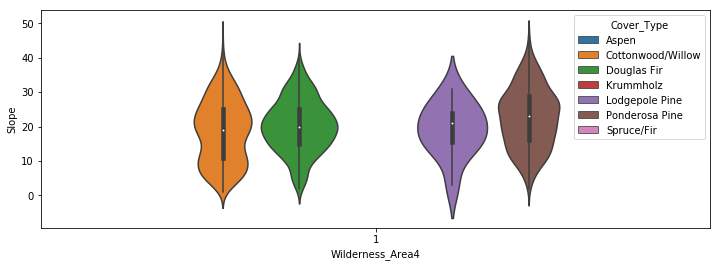

In [57]:
for i in range(1,5):
    a = 'Wilderness_Area' + str(i)
    plt.figure(figsize = (12,4))
    sns.violinplot(x = sample_df[a][sample_df[a] == 1], y = sample_df['Slope'], hue = sample_df['Cover_Type'])

<b> Slope doesn't give any distinctive information about the cover_type. The only big takeaway is the Spruce/Fir type has the lowest slope values. </b>

### Relationship between Aspect and Cover_Type:

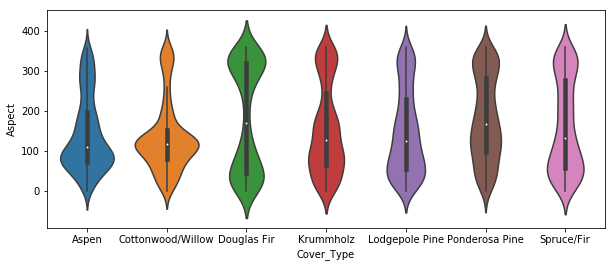

In [58]:
plt.figure(figsize = (10,4))
sns.violinplot(x = sample_df['Cover_Type'], y = sample_df['Aspect'])
plt.show()

### Relationship between Aspect and Wilderness_Area:

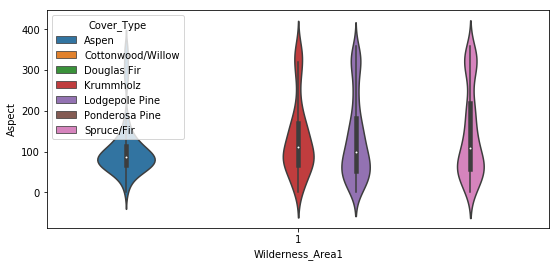

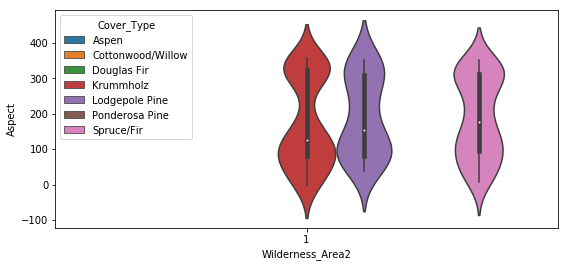

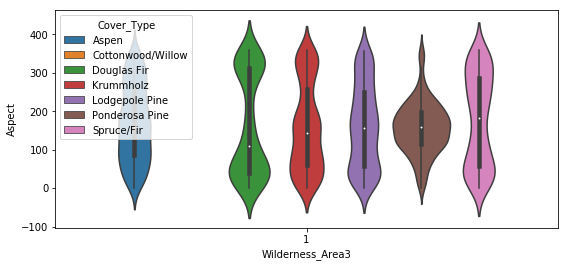

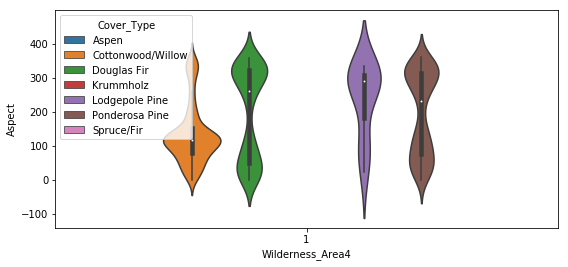

In [59]:
for i in range(1,5):
    a = 'Wilderness_Area' + str(i)
    plt.figure(figsize = (9,4))
    sns.violinplot(x = sample_df[a][sample_df[a] == 1], y = sample_df['Aspect'], hue = sample_df['Cover_Type'])

<b>Similar to Slope, Aspect doesn't give any distinctive information</b>

### Relationship between Aspect and Slope:

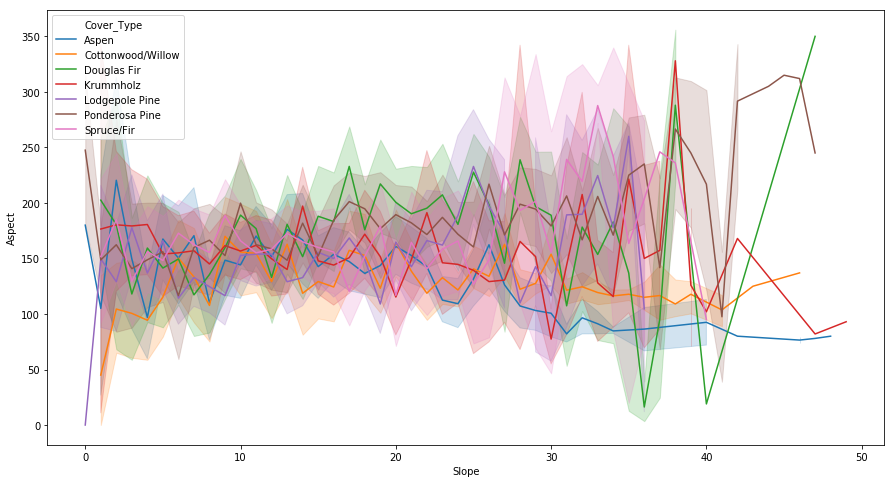

In [46]:
plt.figure(figsize = (15, 8))
sns.lineplot(x = sample_df['Slope'], y = sample_df['Aspect'], hue = sample_df['Cover_Type'])

<b> Although Aspect and Slope are very important in determining the type of Cover_Type, it is not reflected much in our sample. They might still be important in determining the Cover_Type </b>

### Relationship between Horizonatal_Distance_to_Hydrology and Cover_Type:

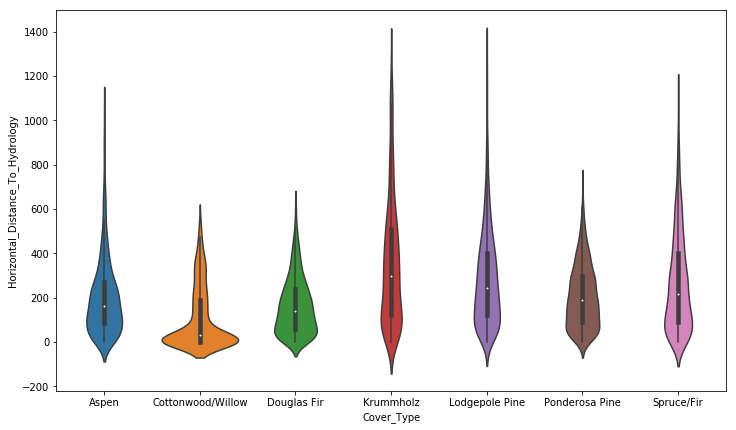

In [54]:
plt.figure(figsize = (12,7))
sns.violinplot(x = sample_df['Cover_Type'], y = sample_df['Horizontal_Distance_To_Hydrology'])
plt.show()

<b> Krummholz can grow in areas not very close to hydrology. Lodgepole pine and Spruce/Fir can also do the same to an extent. </b>

### Relationship between Vertical_Distance_To_Hydrology and Cover_Type:

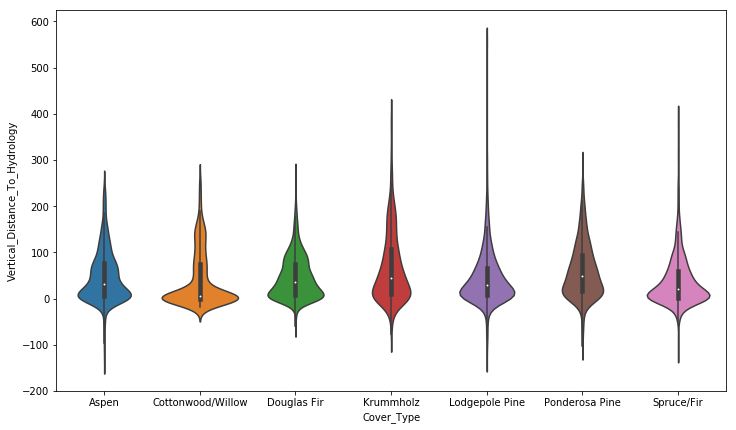

In [62]:
plt.figure(figsize = (12,7))
sns.violinplot(x = sample_df['Cover_Type'], y = sample_df['Vertical_Distance_To_Hydrology'])
plt.show()

<b>There isn't much variation </b>

### Relationship between Horizontal_Distance_To_Roadways and Cover_Type:

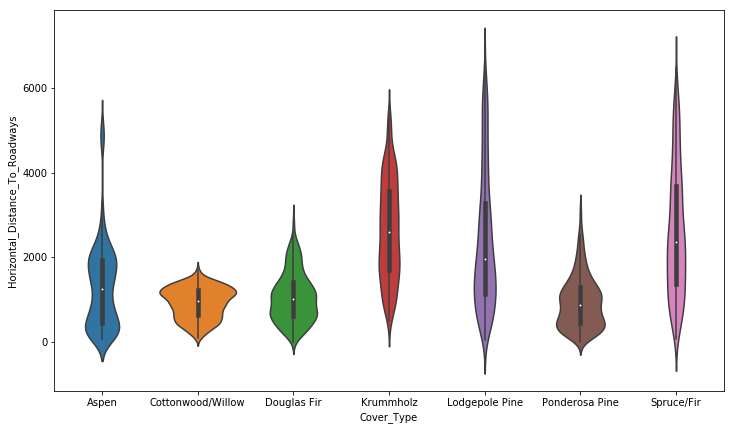

In [63]:
plt.figure(figsize = (12,7))
sns.violinplot(x = sample_df['Cover_Type'], y = sample_df['Horizontal_Distance_To_Roadways'])
plt.show()

<b> Krummholz is generally not present near the road ways. Aspen is the closest to Roadways </b>

### Relationship between Horizontal_Distance_To_Fire_Points and Cover_Type:

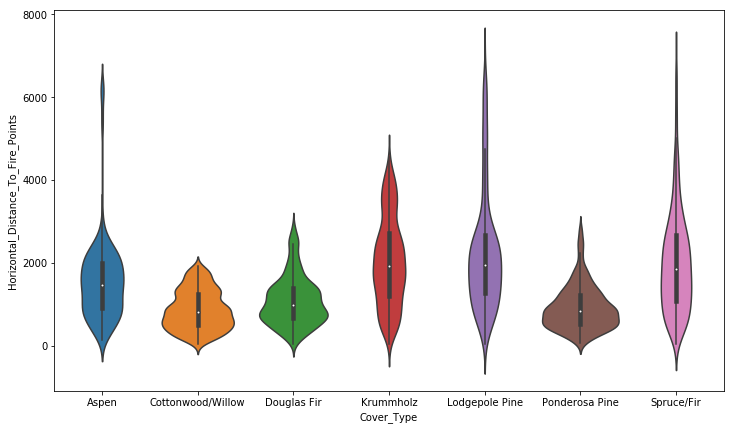

In [64]:
plt.figure(figsize = (12,7))
sns.violinplot(x = sample_df['Cover_Type'], y = sample_df['Horizontal_Distance_To_Fire_Points'])
plt.show()

<b> There isn't much to be said here </b>

### Relationship between Hillshade_9am, Hillshade_noon, Hillshade_3pm and Cover_Type:

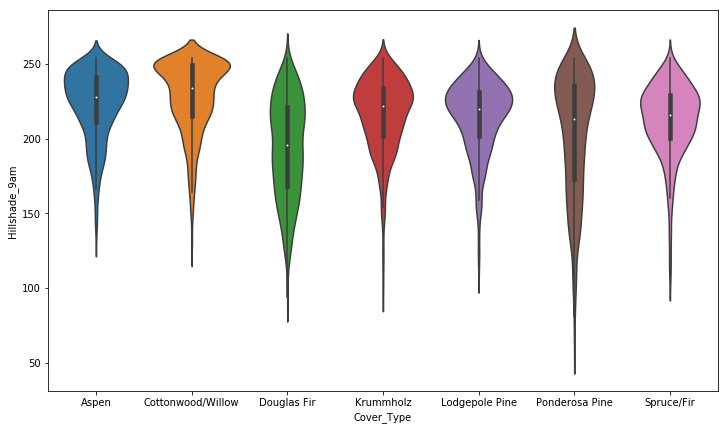

In [77]:
plt.figure(figsize = (12,7))
sns.violinplot(x = sample_df['Cover_Type'], y = sample_df['Hillshade_9am'])
plt.show()

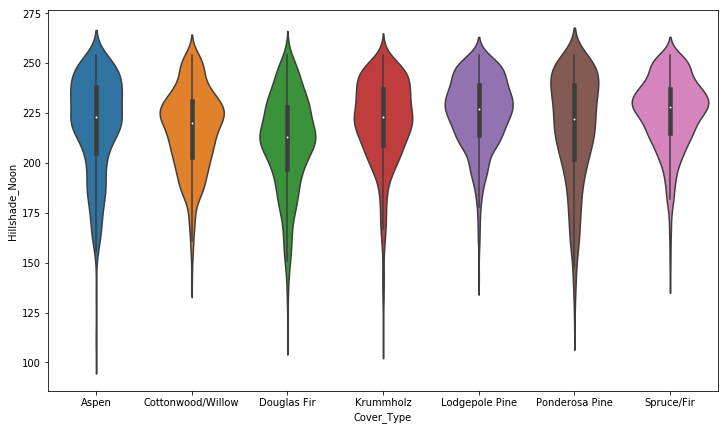

In [78]:
plt.figure(figsize = (12,7))
sns.violinplot(x = sample_df['Cover_Type'], y = sample_df['Hillshade_Noon'])
plt.show()

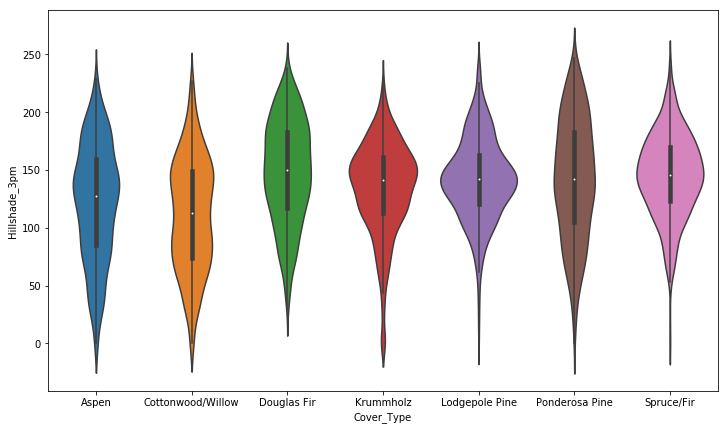

In [79]:
plt.figure(figsize = (12,7))
sns.violinplot(x = sample_df['Cover_Type'], y = sample_df['Hillshade_3pm'])
plt.show()

<b> The hillshade is highest in 9am for Aspen and Cottonwood/Willow and gradually reduces in Noon and 3pm. The same can be observed in the other Cover_Types but the difference isn't as obvious. </b>

<b> Based on the Exploratory Analysis done above, it is quite clear that all of the columns are pretty important in determining the Cover_Type. No column here can be deemed unimportant. </b>

### Constructing a Pairplot:

In [81]:
sample_cols = sample_df.columns.to_list()

In [89]:
s = []
for i in range(10):
    s.append(sample_cols[i])

pplot_df = sample_df[s]

In [90]:
pplot_df['Cover_Type'] = sample_df['Cover_Type']

pplot_df.replace({'Cover_Type': {'Spruce/Fir': 1, 'Lodgepole Pine': 2, 'Ponderosa Pine': 3,
                               'Cottonwood/Willow': 4, 'Aspen': 5, 'Douglas Fir': 6, 'Krummholz': 7}}, 
               inplace = True)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


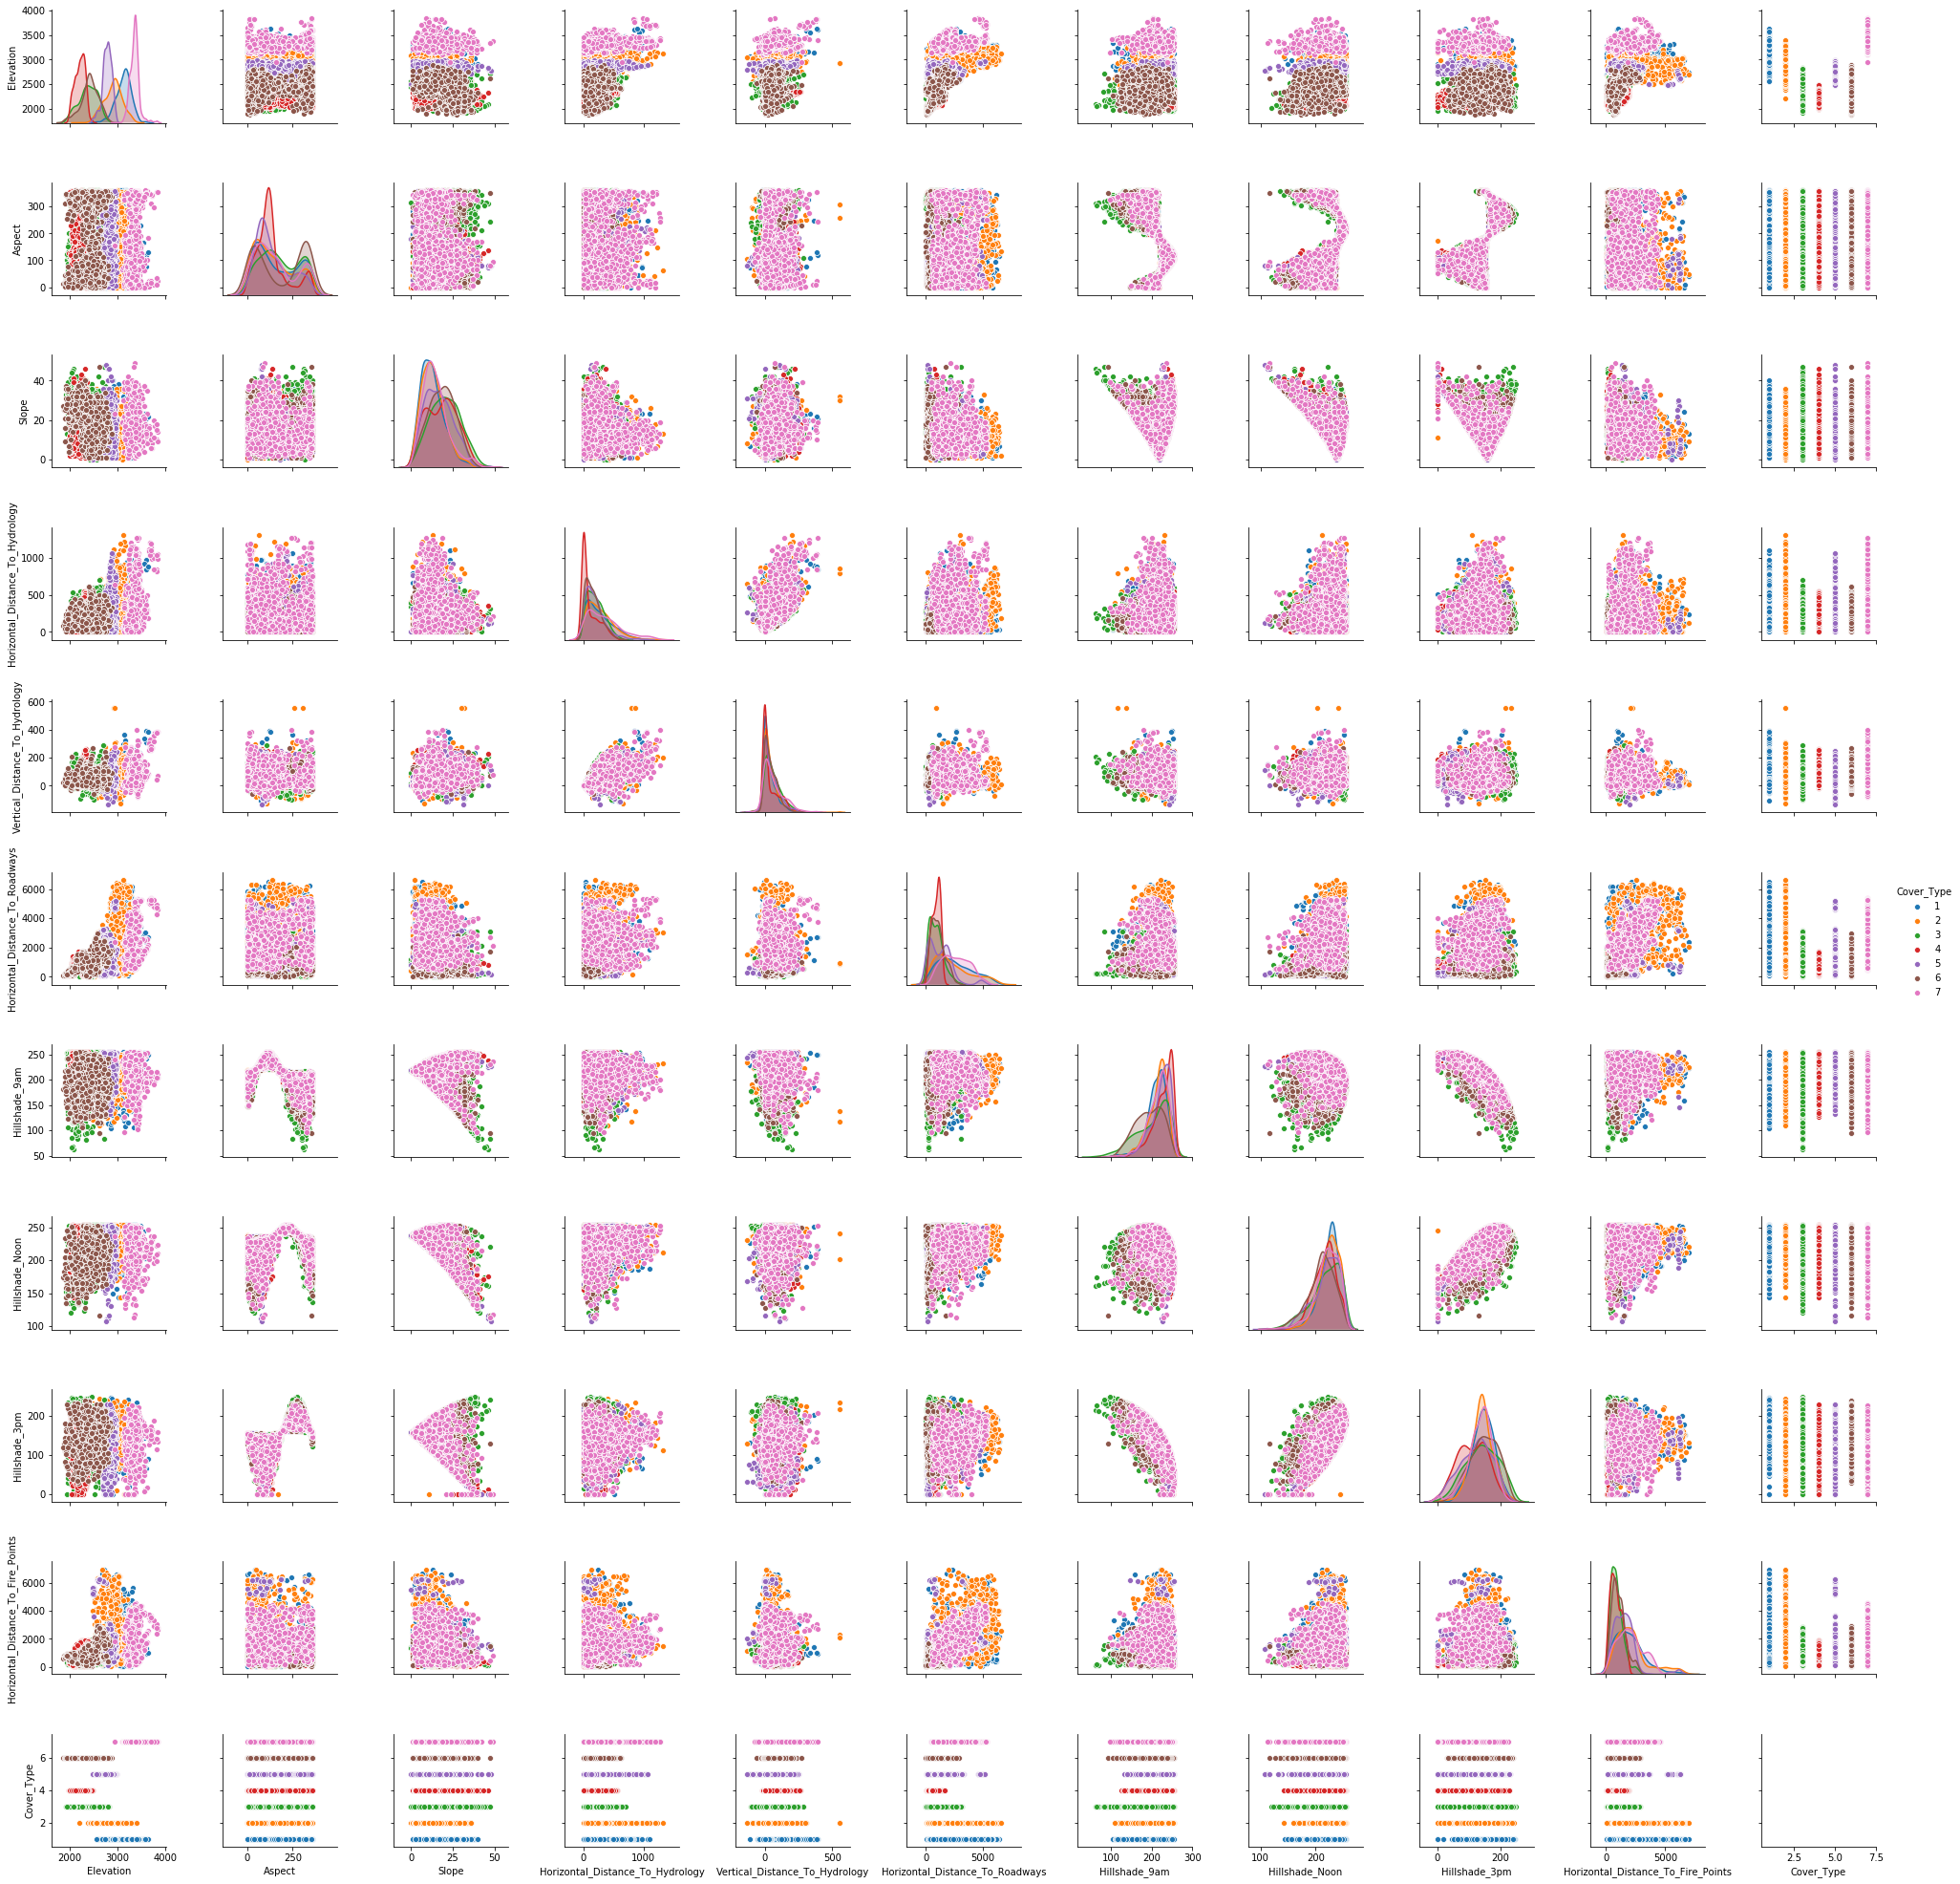

In [95]:
sns.pairplot(pplot_df, hue = 'Cover_Type')